In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
cd "/content/drive/My Drive/Tar_File"

/content/drive/My Drive/Tar_File


In [0]:
!tar -xf ImageNet_Data.tar

In [0]:
# You can change the directory name
LOG_DIR = 'tb_logs'

!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip

import os
if not os.path.exists(LOG_DIR):
  os.makedirs(LOG_DIR)
  
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(LOG_DIR))

get_ipython().system_raw('./ngrok http 6006 &')

!curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

--2019-02-20 00:33:28--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 52.71.139.107, 52.45.248.161, 52.45.111.123, ...
Connecting to bin.equinox.io (bin.equinox.io)|52.71.139.107|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5363700 (5.1M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]   5.11M  7.42MB/s    in 0.7s    

2019-02-20 00:33:29 (7.42 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [5363700/5363700]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   
Traceback (most recent call last):
  File "<string>", line 1, in <module>
IndexError: list index out of range


Found 100000 images belonging to 200 classes.
Found 10000 images belonging to 200 classes.
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
2000/2000 [==============================] - 1077s 538ms/step - loss: 4.9057 - acc: 0.0308 - val_loss: 4.3824 - val_acc: 0.0811
Epoch 2/10
2000/2000 [==============================] - 1056s 528ms/step - loss: 4.2099 - acc: 0.1030 - val_loss: 3.8462 - val_acc: 0.1491
Epoch 3/10
2000/2000 [==============================] - 1049s 525ms/step - loss: 3.7919 - acc: 0.1613 - val_loss: 3.4745 - val_acc: 0.2133
Epoch 4/10
2000/2000 [==============================] - 1055s 528ms/step - loss: 3.5516 - acc: 0.2008 - val_loss: 3.3450 - val_acc: 0.2413
Epoch 5/10
2000/2000 [==============================] - 1087s 544ms/step - loss: 3.3945 - acc: 0.2275 - val_loss: 3.2339 - val_acc: 0.2604
Epoch 6/10
2000/2000 [==============================] - 1069s 534ms/step - loss: 3.2658 - acc: 0.2508 - val_loss: 3.1372 - val_acc: 0.2780
Epoch 7/10
2000/2000 [=====

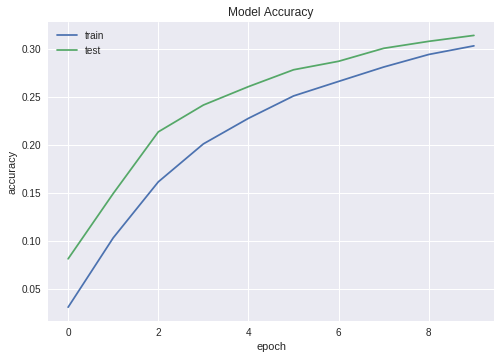

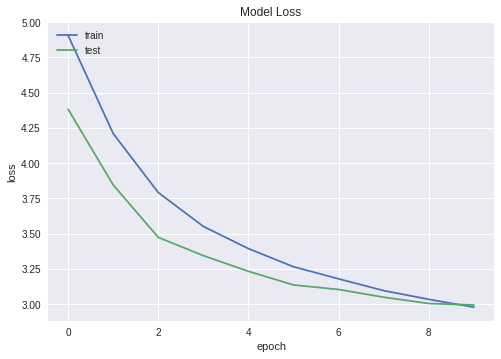

In [0]:
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
#from keras.utils.sequence  import steps_per_epoch 
from keras.optimizers import adamax
import os
import matplotlib.pyplot as plt
# from keras.callbacks import TensorBoard

batch_size = 128
num_classes = 200
epochs = 10
data_augmentation = True
#num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_MaxNet_trained_model.h5'

# The data, split between train and test sets:
#(x_train, y_train), (x_test, y_test) = cifar10.load_data()
#print('x_train shape:', x_train.shape)
#print(x_train.shape[0], 'train samples')
#print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
#y_train = keras.utils.to_categorical(y_train, num_classes)
#y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(64, (3, 3), padding='same',
                 input_shape=(32,32,3)))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.24))


model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.35))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.24))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.adamax()

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

#x_train = x_train.astype('float32')
#x_test = x_test.astype('float32')
#x_train /= 255
#x_test /= 255

# tbCallBack = TensorBoard(log_dir=LOG_DIR, 
#                          histogram_freq=1,
#                          write_graph=True,
#                          write_grads=True,
#                          batch_size=batch_size,
#                          write_images=True)

    
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        "/content/drive/My Drive/Tar_File/ImageNet_Data/Train",
        target_size=(32, 32),
        batch_size=batch_size,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        '/content/drive/My Drive/Tar_File/ImageNet_Data/Validation',
        target_size=(32, 32),
        batch_size=batch_size,
        class_mode='categorical')

train_history = model.fit_generator(
        train_generator,
        steps_per_epoch=2000,
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=200)    

# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)



# list all data in history
print(train_history.history.keys())
# summarize history for accuracy
plt.plot(train_history.history['acc'])
plt.plot(train_history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


Lets load an Image the model has never seen before to test the model

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import os
def load_image(img_path, show=True):
   img = image.load_img(img_path, target_size=(32, 32))
   img_tensor = image.img_to_array(img)                    # (height, width, channels)
   img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
   img_tensor /= 255.                                      # imshow expects values in the range [0, 1]
   if show:
       plt.imshow(img_tensor[0])
       plt.axis('off')
       plt.show()
   return img_tensor

We will load the saved model from above

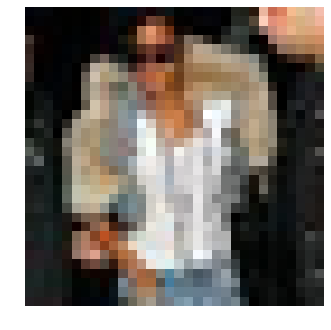

In [0]:
from keras.models import load_model
from keras.preprocessing import image
import matplotlib.pyplot as plt
# load model
model = load_model("/content/drive/My Drive/Tar_File/saved_models/keras_MaxNet_trained_model.h5")

# load a single image
new_image = load_image("/content/drive/My Drive/Tar_File/ImageNet_Data/Test/test_1004.png")

# check prediction
pred = model.predict(new_image)

Looks like a woman in a white dress wearing glasses and robe

In [0]:
pred.shape

(1, 200)

In [0]:
import pandas as pd

In [0]:
df = pd.read_csv("/content/drive/My Drive/Tar_File/class_description_tiny_imagenet.csv")

In [0]:
df.head()

,folder,class
0,n01443537,goldfish or Carassius auratus
1,n01629819,European fire salamander or Salamandra salama...
2,n01641577,bullfrog or Rana catesbeiana
3,n01644900,tailed frog or bell toad or ribbed toad or ...
4,n01698640,American alligator or Alligator mississipiensis


In [0]:
df['probability']= pred[0].tolist()

Probability of each class in descending order 

In [0]:
df.sort_values(['probability'], ascending=0).head(10)

,folder,class,probability
112,n03617480,kimono,0.114352
60,n02669723,academic gown or academic robe or judge's robe,0.060282
123,n03814639,neck brace,0.060033
163,n04456115,torch,0.056395
68,n02802426,basketball,0.055654
77,n02883205,bow tie or bow-tie or bowtie,0.039199
131,n03970156,plunger or plumber's helper,0.039052
62,n02730930,apron,0.036937
169,n04532106,vestment,0.036476
138,n04023962,punching bag or punch bag or punching ball o...,0.030814


Probability from the bottom

In [0]:
df.sort_values(['probability'], ascending=0).tail(10)

,folder,class,probability
154,n04311004,steel arch bridge,0.000010
8,n01774384,black widow or Latrodectus mactans,0.000010
50,n02410509,bison,0.000010
162,n04417672,thatch or thatched roof,0.000009
66,n02793495,barn,0.000007
70,n02814533,beach wagon or station wagon or wagon or es...,0.000005
195,n09246464,cliff or drop or drop-off,0.000004
166,n04487081,trolleybus or trolley coach or trackless tro...,0.000004
22,n02058221,albatross or mollymawk,0.000003
23,n02074367,dugong or Dugong dugon,0.000002
